# Conquering Fashion MNIST Dataset by CNN using Computer Vision

 ## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # uses matplotlib underneath to  plot graphs, and visualise random distributions
import keras

2023-07-08 07:59:45.481113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

#### Loading Dataset

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["Sneaker","Trouser/Jeans","Handbag","Dress","Coat/Blazzer","Slipper/Sandal","Shirt","T-shirt/top","Pullover","Ankle boot"]

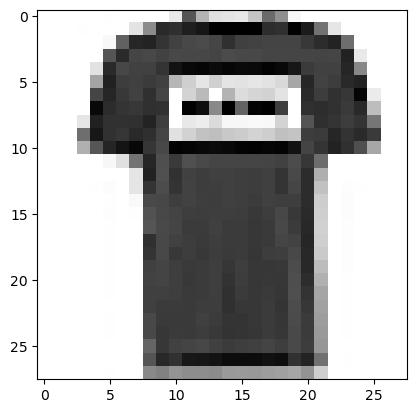

In [8]:
plt.imshow(X_train[1],cmap='Greys')

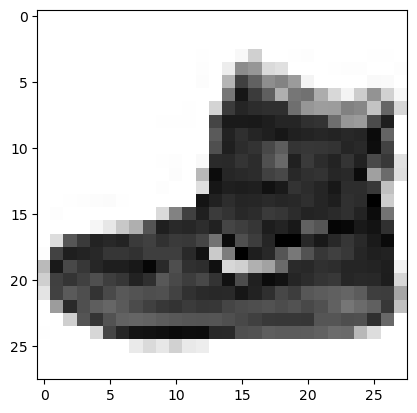

In [9]:
plt.imshow(X_train[0],cmap='Greys')

In [10]:

class_labels[y_test[0]]

'Ankle boot'

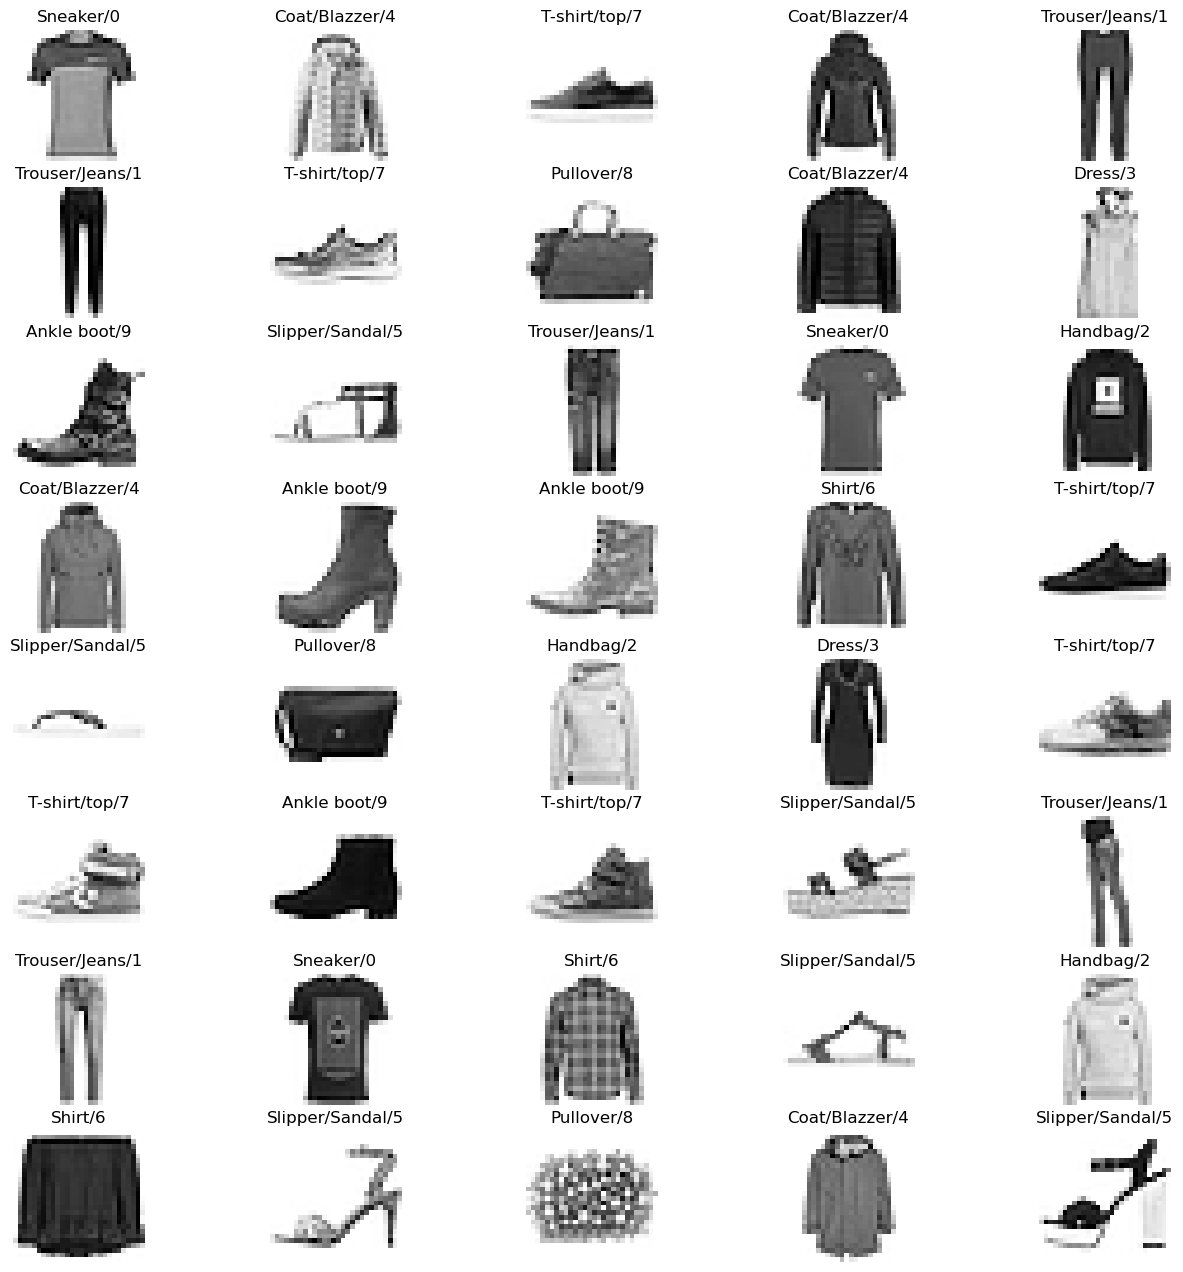

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,40):
    plt.subplot(8,5,j);j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

#### Changing dimension  --> Reshaping

In [12]:
X_train.ndim

3

In [13]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_train.ndim

4

### Feature Scaling --> Normalization

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

 ### Splitting dataset (Train-Validation split)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2030)

In [19]:
X_train.shape , y_train.shape

((48000, 28, 28, 1), (48000,))

In [20]:
X_val.shape , y_val.shape

((12000, 28, 28, 1), (12000,))

## CNN - Model Building

### CNN model without applying Regularization

In [21]:
model=keras.models.Sequential([
                            keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                            keras.layers.MaxPooling2D(pool_size=(2,2)), 
                            keras.layers.Flatten(),
                            keras.layers.Dense(units=128,activation='relu'), 
                            keras.layers.Dense(units=10,activation='softmax'),
                            
    
])

### CNN model with Regularization
**--> To decrease overfitting of the model we will apply dropout function and will add some hidden layers**

In [22]:
model=keras.models.Sequential([
                            keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                            keras.layers.MaxPooling2D(pool_size=(2,2)), #to decrease the size of the images
    
                            keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                            keras.layers.MaxPooling2D(pool_size=(2,2)), 
    
                            keras.layers.Flatten(), #to convert images into single vector
    
                            keras.layers.Dense(units=128,activation='relu'),  # input layer
                            keras.layers.Dropout(0.25),
    
                            keras.layers.Dense(units=256,activation='relu'),  #first hidden layer
                            keras.layers.Dropout(0.25),
    
                            keras.layers.Dense(units=128,activation='relu'),  #second hidden layer
                            keras.layers.Dense(units=10,activation='softmax'), # to find the probability  --> Output layer
                            
    
])

2023-07-08 07:59:56.152789: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model training

In [25]:
model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
94/94 [==============================] - 11s 112ms/step - loss: 1.0649 - accuracy: 0.5991 - val_loss: 0.6020 - val_accuracy: 0.7673
Epoch 2/20
94/94 [==============================] - 9s 98ms/step - loss: 0.5483 - accuracy: 0.7940 - val_loss: 0.4725 - val_accuracy: 0.8217
Epoch 3/20
94/94 [==============================] - 10s 104ms/step - loss: 0.4573 - accuracy: 0.8303 - val_loss: 0.4089 - val_accuracy: 0.8513
Epoch 4/20
94/94 [==============================] - 10s 105ms/step - loss: 0.4035 - accuracy: 0.8516 - val_loss: 0.3636 - val_accuracy: 0.8677
Epoch 5/20
94/94 [==============================] - 11s 114ms/step - loss: 0.3647 - accuracy: 0.8662 - val_loss: 0.3368 - val_accuracy: 0.8751
Epoch 6/20
94/94 [==============================] - 11s 113ms/step - loss: 0.3419 - accuracy: 0.8749 - val_loss: 0.3249 - val_accuracy: 0.8802
Epoch 7/20
94/94 [==============================] - 11s 119ms/step - loss: 0.3263 - accuracy: 0.8817 - val_loss: 0.3137 - val_accuracy: 0.8809
E

## Model Testing

In [26]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 147ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 33ms/step


9

In [28]:
y_pred=model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.83, 0.  , 0.  ]], dtype=float32)

## Model Evaluation

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2808 - accuracy: 0.9038


[0.2808073163032532, 0.9038000106811523]

#### Visualize model

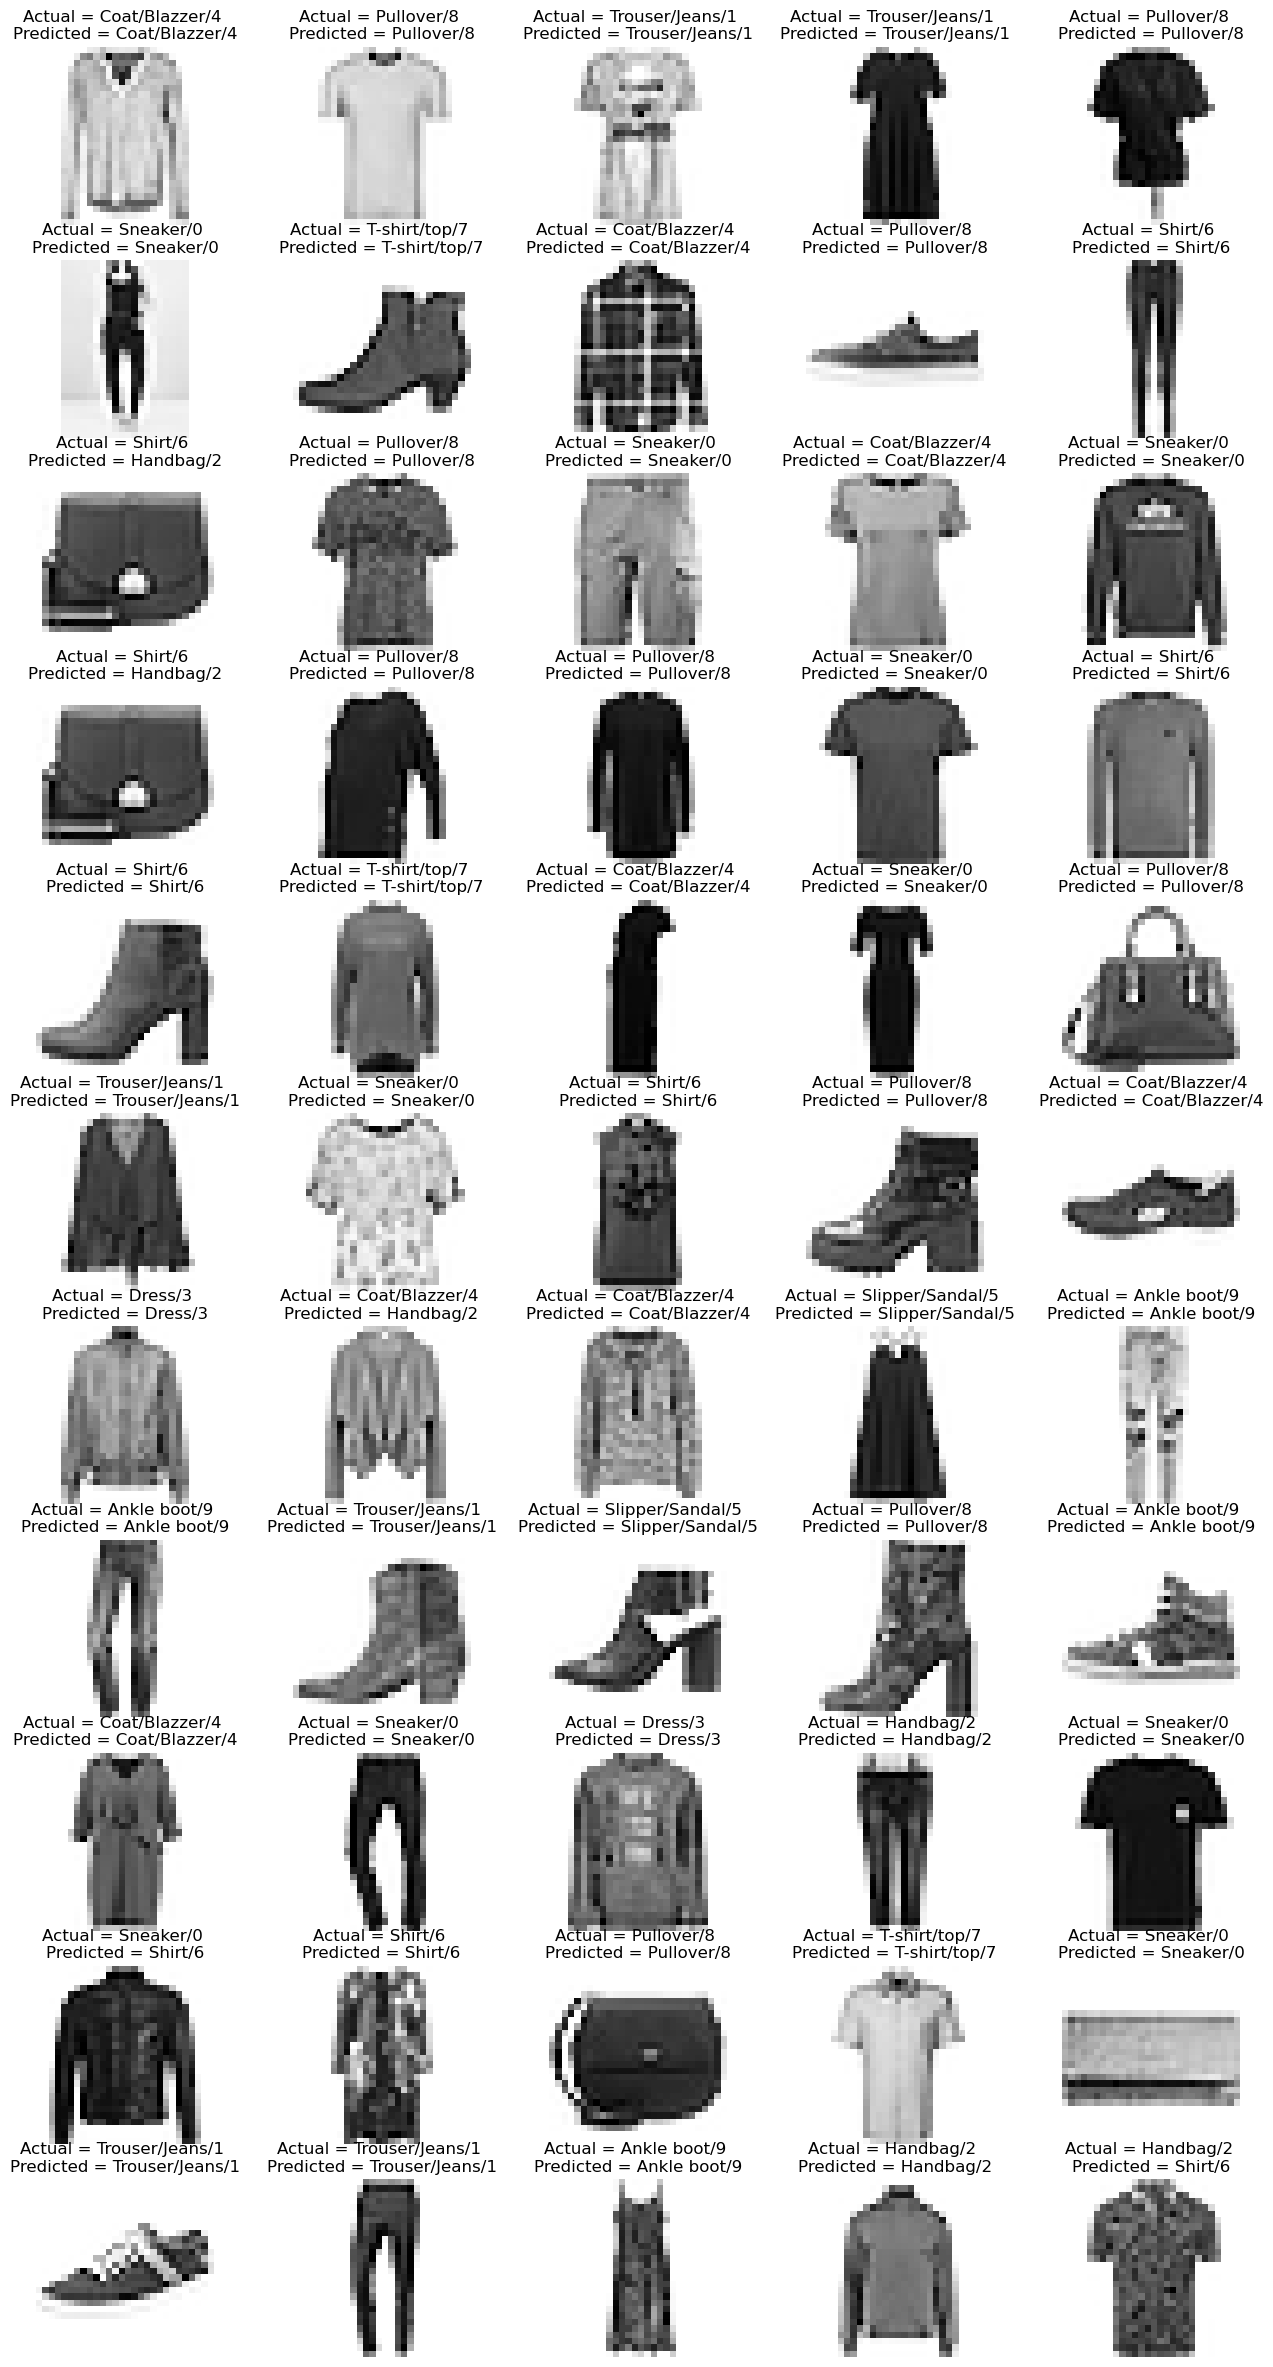

In [30]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,55):
    plt.subplot(11,5,j);j+=1
    plt.imshow(X_train[i].reshape(28,28),cmap='Greys')
    plt.axis('off')
    plt.title('Actual = {}/{} \nPredicted = {}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

## Accuracy Measurement

### Confusion Matrix

<AxesSubplot:>

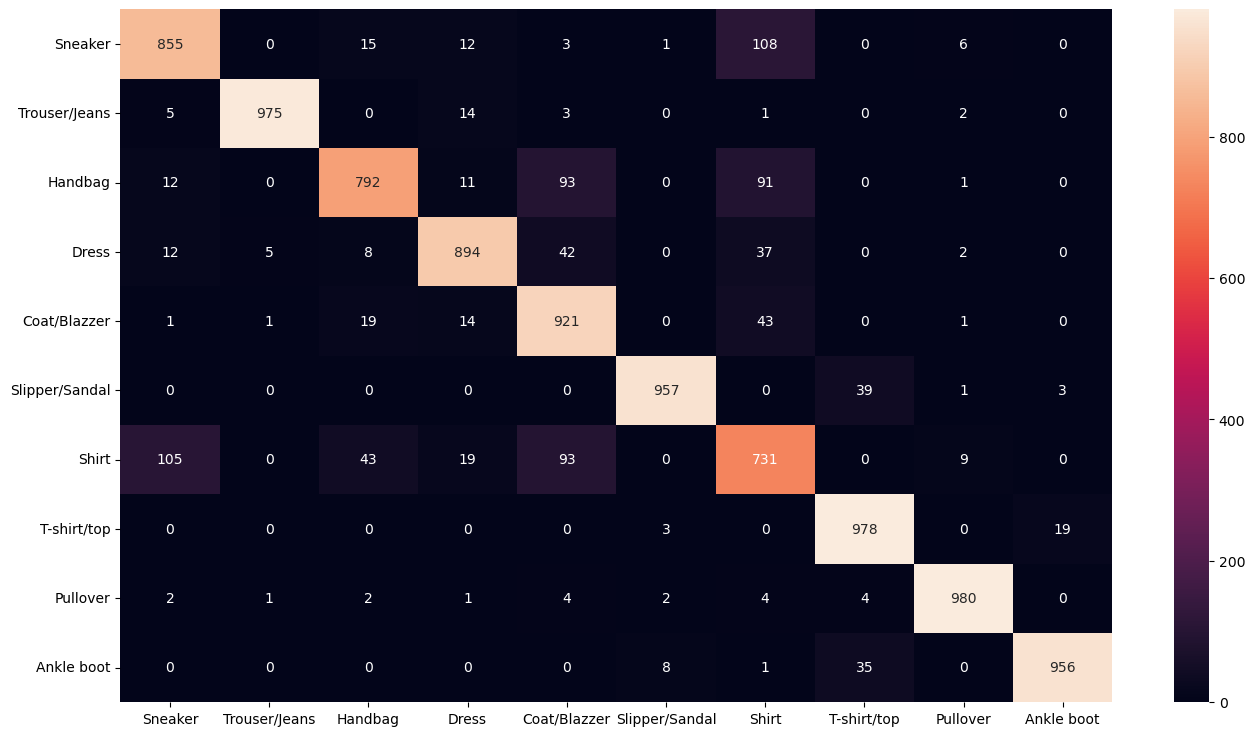

In [31]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_lables = [np.argmax(lable) for lable in y_pred]
cm = confusion_matrix(y_test,y_pred_lables)

#show cm
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

### Classification Report

In [32]:
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN)

from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_lables,target_names=class_labels)
print(cr)


                precision    recall  f1-score   support

       Sneaker       0.86      0.85      0.86      1000
 Trouser/Jeans       0.99      0.97      0.98      1000
       Handbag       0.90      0.79      0.84      1000
         Dress       0.93      0.89      0.91      1000
  Coat/Blazzer       0.79      0.92      0.85      1000
Slipper/Sandal       0.99      0.96      0.97      1000
         Shirt       0.72      0.73      0.73      1000
   T-shirt/top       0.93      0.98      0.95      1000
      Pullover       0.98      0.98      0.98      1000
    Ankle boot       0.98      0.96      0.97      1000

      accuracy                           0.90     10000
     macro avg       0.91      0.90      0.90     10000
  weighted avg       0.91      0.90      0.90     10000



## Save Model

In [33]:
model.save('fashion_classification_CNN_model.h5')

## Tensorflow to OpenVino IR model conversion

In [34]:
import tensorflow as tf
modelIR = tf.keras.models.load_model('fashion_classification_CNN_model.h5')
tf.saved_model.save(modelIR,'modelIR')

2023-07-08 08:03:26.532423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-07-08 08:03:26.543143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-07-08 08:03:26.824362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-07-08 08:03

INFO:tensorflow:Assets written to: modelIR/assets


INFO:tensorflow:Assets written to: modelIR/assets


### Infering IR model to test accuracy

In [35]:
from openvino.inference_engine import IECore, IENetwork
ie = IECore()
net =  ie.read_network(model="saved_model.xml", weights="saved_model.bin")
exec_net =  ie.load_network(network=net, device_name="CPU")

In [36]:
assert len(net.input_info.keys()) == 1, "Sample supports only single input topologies"
assert len(net.outputs) == 1, "Sample supports only single output topologies"
input_blob = next(iter(net.input_info.keys()))
out_blob = next(iter(net.outputs))
net.batch_size = len([0])
net.input_info[input_blob].input_data.shape

[1, 28, 28, 1]

In [37]:
res = exec_net.infer(inputs={input_blob: X_test[0]})
res1=res[out_blob]
res1

array([[1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.2445054e-03,
        1.2261685e-06, 9.9866545e-01],
       [1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.2445054e-03,
        1.2261685e-06, 9.9866545e-01],
       [1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.2445054e-03,
        1.2261685e-06, 9.9866545e-01],
       [1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.2445054e-03,
        1.2261685e-06, 9.9866545e-01],
       [1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.2445054e-03,
        1.2261685e-06, 9.9866545e-01],
       [1.6046616e-07, 4.5180645e-06, 2.3275766e-07, 1.4475186e-06,
        9.0320378e-07, 8.1432088e-05, 1.3757318e-07, 1.24

In [38]:
res1.shape

(10, 10)

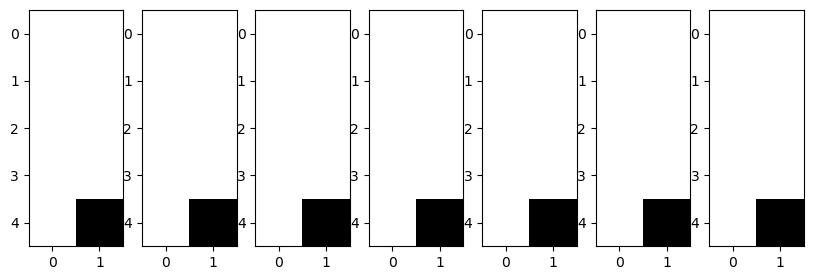

In [39]:
plt.figure(figsize=(10,10))
j=1
for i in np.random.randint(0,10,7):
    plt.subplot(1,7,j);j+=1
    plt.imshow(res1[i].reshape(5,2),cmap='Greys')
    